In [1]:
import numpy as np

# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits

In [2]:
image_data = fits.getdata('../J1046+57/CFHTMEGAPIPE-G011.161.918+58.083-G011.161.918+58.083.U/G011.161.918+58.083.U.fits')
image_data = image_data*9280

In [7]:
#new_image = 1/np.sqrt(image_data)
#new_image = image_data
#new_image = image_data/np.sum(image_data)
#hdu = fits.PrimaryHDU(new_image)
#hdu.writeto('../J1046+57/psf_norm.fits', clobber=True)

In [30]:
from astropy.nddata import Cutout2D
from astropy import units as u
#position = (13817.176, 6105.3219)
#position = (13626.554, 5955.7477)
#size = (100, 100)     # pixels
position = (14450.226, 6547.8386)
size = (80, 80)     # pixels
cutout = Cutout2D(image_data, position, size)

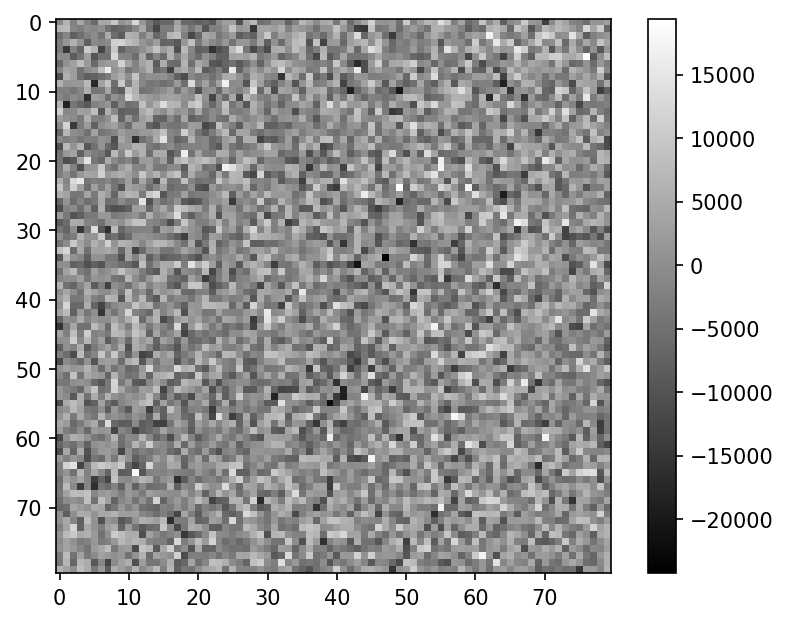

In [31]:
from matplotlib.colors import LogNorm
plt.imshow(cutout.data, cmap='gray')
plt.colorbar()

In [32]:
std_sky = np.std(cutout.data)
flux_sky = std_sky**2 * 1.62
print(flux_sky)
std_sky

55232807.883060314


5839.0347

In [33]:
#position = (13817.176, 6105.3219)
#position = (13626.554, 5955.7477)
position = (14374.874, 6574.6304)
size = (30, 30)     # pixels
cutout = Cutout2D(image_data, position, size)

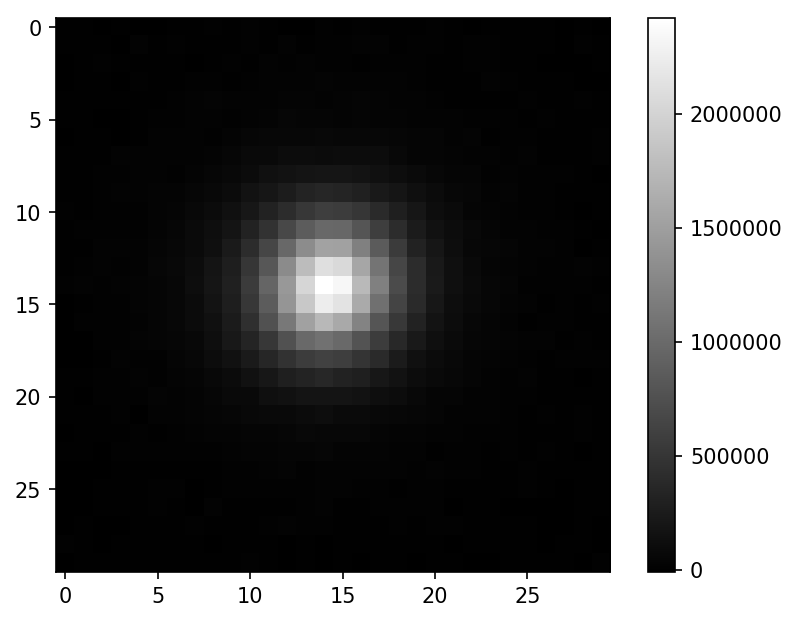

In [34]:
from matplotlib.colors import LogNorm
plt.imshow(cutout.data, cmap='gray')
plt.colorbar()

In [35]:
psf_data = cutout.data
full_psf_data = psf_data + flux_sky
err_flux_psf = np.sqrt(full_psf_data/1.62)
hdu = fits.PrimaryHDU(full_psf_data/9280)
hdu.writeto('../J1046+57/psf1_raw.fits', clobber=True)

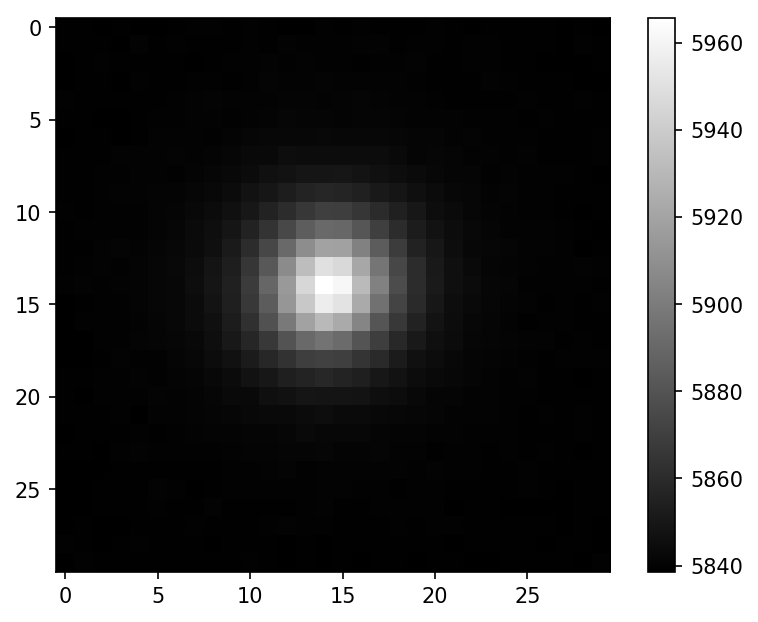

In [36]:
from matplotlib.colors import LogNorm
plt.imshow(err_flux_psf, cmap='gray')
plt.colorbar()

In [37]:
hdu = fits.PrimaryHDU(err_flux_psf/9280)
hdu.writeto('../J1046+57/psf1_var.fits', clobber=True)

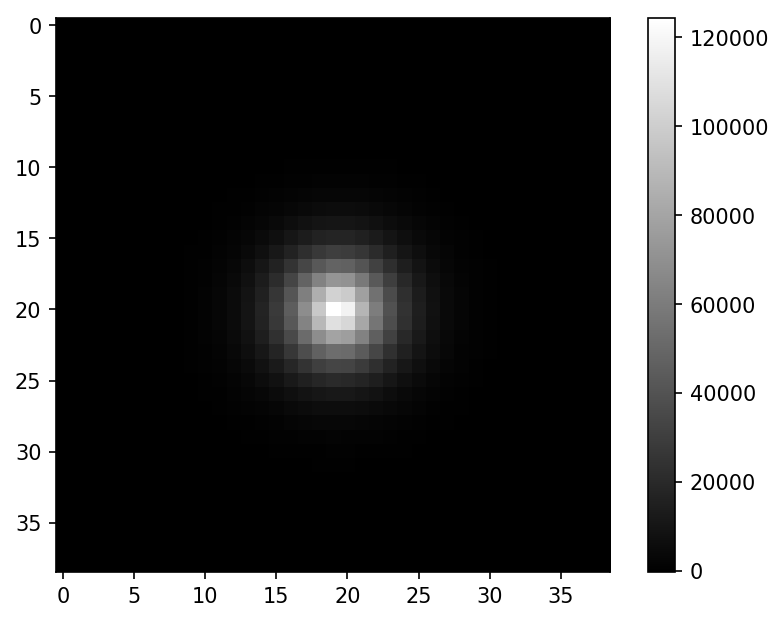

In [58]:
psf_model = fits.getdata('../J1046+57/psf_model.fits')
plt.imshow(psf_model, cmap='gray')
plt.colorbar()

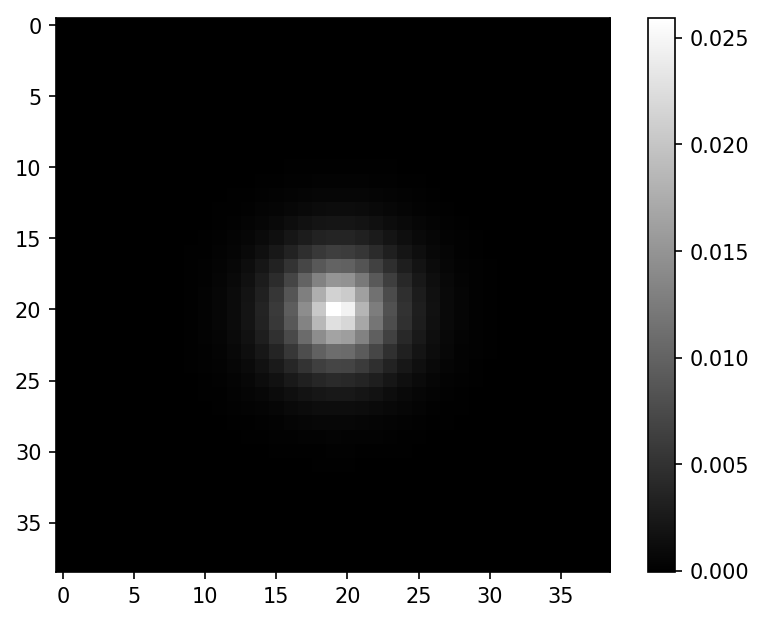

In [59]:
summ = np.sum(psf_model)
psf_model = psf_model/summ
plt.imshow(psf_model, cmap='gray')
plt.colorbar()

In [60]:
hdu = fits.PrimaryHDU(psf_model)
hdu.writeto('../J1046+57/psf_model_norm', clobber=True)

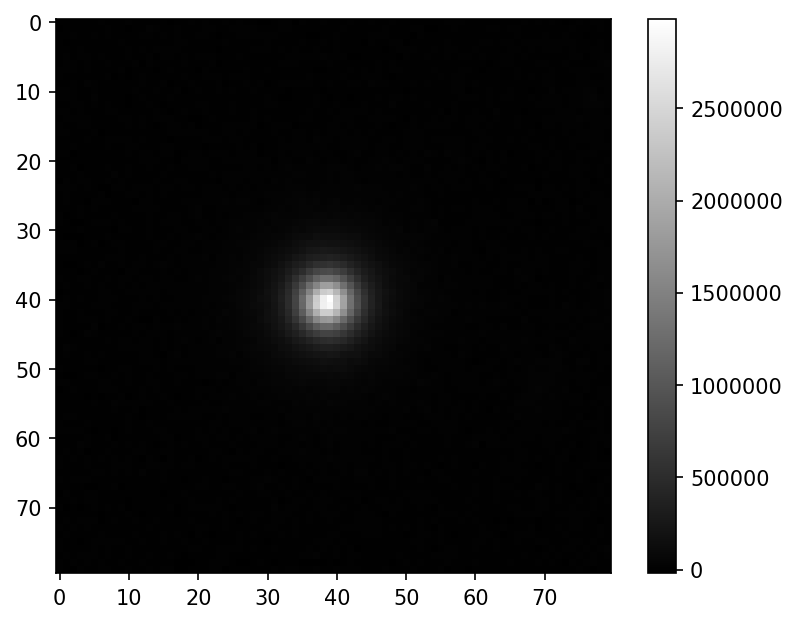

In [52]:
position = (13670.554, 5879.7477)
size = (80, 80)     # pixels
cutout = Cutout2D(image_data, position, size)
plt.imshow(cutout.data, cmap='gray')
plt.colorbar()

In [53]:
gal_data = cutout.data
full_gal_data = gal_data + flux_sky
hdu = fits.PrimaryHDU(gal_data/9280)
hdu.writeto('../J1046+57/gal.fits', clobber=True)
err_flux_gal = np.sqrt(full_gal_data/1.62)
hdu = fits.PrimaryHDU(err_flux_gal/9280)
hdu.writeto('../J1046+57/gal_var.fits', clobber=True)

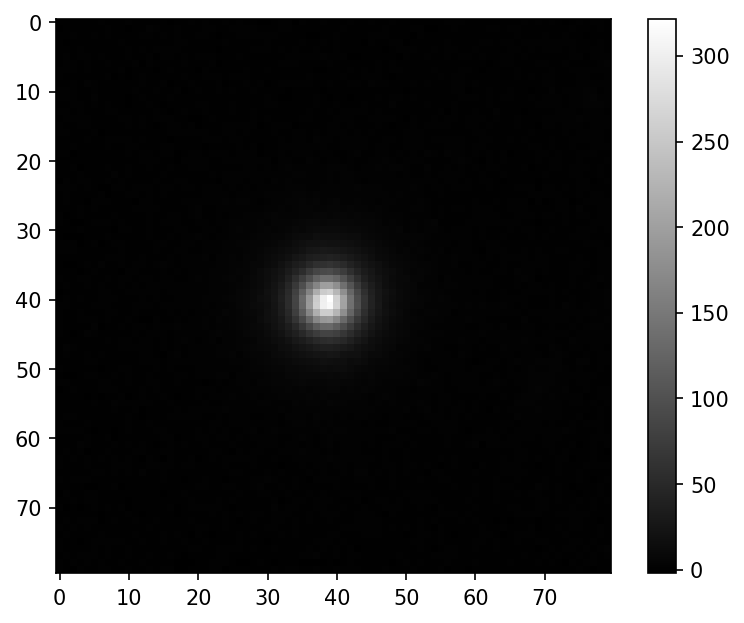

In [57]:
plt.imshow(gal_data/9280, cmap='gray')
plt.colorbar()

In [34]:
m_b, m_disk = 19.4325, 18.0988
-2.5 * np.log10(10**(-0.4*m_b) + 10**(-0.4*m_disk))

17.82000055795103

In [35]:
from astropy import units as u
m_b = m_b * u.ABmag
m_b

<Magnitude 19.4325 mag(AB)>

In [36]:
J = m_b.to(u.Jy)
J

<Quantity 6.12350392e-05 Jy>

In [51]:
J = J.to(u.erg / u.s / u.cm**2 / u.Hz)

In [52]:
def flux_to_luminosity(flux, z=None, d=None):
    """
    @param flux: flux in erg/s/cm2
    @param z: redshift, or:
    @param d: distance in Mpc
    """
    if d:
        d = d * u.Mpc
    else:
        d = cosmo.luminosity_distance(z).to(u.cm)   
    return 4 * np.pi * (d.to(u.cm))**2 * (flux)

In [53]:
from astropy.cosmology import WMAP9 as cosmo
L = flux_to_luminosity(J, z=0.029)

In [54]:
L

<Quantity 1.20501946e+27 erg / (Hz s)>